# INTRODUCTION TO PYTHON FOR DATA SCIENCE

## _Python Fundamentals through Examples_

## EIPA
online, September 18 - 22, 2023

### [Dr. Christian Kauth](https://www.linkedin.com/in/ckauth/)

# Data Analysis

<img src="https://images.unsplash.com/photo-1591696205602-2f950c417cb9?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2340&q=80" alt="crossroad" width="1000px"/>

In [1]:
from IPython.display import Markdown as md
import numpy as np
import os
import pandas as pd

# Some Randomness, for Fun

In [2]:
import random
random.seed(0) # pick your seed

# Data

In [3]:
!pip install eurostatapiclient

In [4]:
from eurostatapiclient import EurostatAPIClient

#Set versions and formats, so far only the ones used here are availeable and call client
VERSION = '1.0'
FORMAT = 'json'
LANGUAGE = 'en'
client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)

In [5]:
%%html
<iframe src="https://ec.europa.eu/eurostat/databrowser/view/env_waspacr/default/table?lang=en" width="1000" height="800"></iframe>

In [6]:
countries_names = {'AT':'Austria', 'BE':'Belgium', 'BG':'Bulgaria', 'CY': 'Cyprus',
                   'CZ': 'Czechia', 'DE': 'Germany', 'DK': 'Denmark', 'EE':'Estonia',
                   'EL': 'Greece', 'ES':'Spain', 'FI':'Finland', 'FR':'France',
                   'HR':'Croatia', 'HU':'Hungary', 'IE':'Ireland', 'IT':'Italy',
                   'LT':'Lithuania', 'LU':'Luxembourg', 'LV':'Latvia', 'MT': 'Malta',
                   'NL':'Netherlands', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania',
                   'SE':'Sweden', 'SI':'Slovenia', 'SK':'Slovakia', 'UK':'United Kingdom'}

packaging_types = {'W150101': 'Paper and cardboard packaging',
                   'W150102': 'Plastic packaging',
                   'W150103': 'Wooden packaging',
                   'W150104': 'Metallic packaging',
                   'W150107': 'Glass packaging',
                   'W150199': 'Other packaging'}

In [7]:
par_df1 = {
    'waste': packaging_types.keys(),
    'unit': ['RT'],
    'geo': list(countries_names.keys()),
}

df1 = client.get_dataset('env_waspacr', params=par_df1).to_dataframe()

In [8]:
# If you have the file already, you can load it form your disk / cloud
'''
import importlib.util
import os

if importlib.util.find_spec('google'):
    from google.colab import drive
    drive.mount('/content/gdrive', force_remount=True)
    data_dir = os.path.join('gdrive', 'pathToYourFolder')
else:
    data_dir = '.'

data_dir = os.path.join(data_dir, 'data')
os.makedirs(data_dir, exist_ok=True)
data_dir

df1 = pd.read_csv(os.path.join(data_dir, 'env_waspacr.csv'))
df1.sample(5)
'''

"\nimport importlib.util\nimport os\n\nif importlib.util.find_spec('google'):\n    from google.colab import drive\n    drive.mount('/content/gdrive', force_remount=True)\n    data_dir = os.path.join('gdrive', 'pathToYourFolder')\nelse:\n    data_dir = '.'\n    \ndata_dir = os.path.join(data_dir, 'data')\nos.makedirs(data_dir, exist_ok=True)\ndata_dir\n\ndf1 = pd.read_csv(os.path.join(data_dir, 'env_waspacr.csv'))\ndf1.sample(5)\n"

# Understand your Data Numerically

## Sneak a Peek

In [9]:
df1.sample(n=20)

,values,freq,waste,unit,geo,time
1562,18.5,A,W150103,RT,FR,1999
3958,0.1,A,W150199,RT,SK,2019
1110,19.9,A,W150102,RT,NL,2003
3090,50.5,A,W150107,RT,HU,2015
2328,NaN,A,W150104,RT,LV,1997
991,21.2,A,W150102,RT,LV,2004
3510,1.1,A,W150199,RT,IE,2003
3115,29.5,A,W150107,RT,MT,2016
455,89.4,A,W150101,RT,NL,2020
1440,68.2,A,W150103,RT,DE,1997


In [10]:
df1.rename(columns={'geo': 'country', 'time': 'year'}, inplace=True)
df1.drop('unit', axis=1, inplace=True)

In [11]:
df1.sample(n=20)

,values,freq,waste,country,year
2747,69.9,A,W150107,CZ,2008
2721,76.9,A,W150107,BG,2006
1526,65.9,A,W150103,EL,2011
2944,65.4,A,W150107,HR,2013
578,NaN,A,W150101,SK,1999
320,59.1,A,W150101,LV,2005
947,31.1,A,W150102,IT,2008
1638,NaN,A,W150103,CY,2003
2508,43.1,A,W150104,PL,2009
1306,41.7,A,W150102,SE,2007


In [12]:
df1['country'] = df1['country'].map(countries_names)
df1['waste'] = df1['waste'].map(packaging_types)

In [13]:
df1.sample(n=20)

,values,freq,waste,country,year
1970,NaN,A,Wooden packaging,Sweden,1999
586,86.1,A,Paper and cardboard packaging,Slovakia,2007
1869,76.5,A,Wooden packaging,Portugal,2018
3510,1.1,A,Other packaging,Ireland,2003
2605,40.6,A,Metallic packaging,Slovakia,2010
1428,86.1,A,Wooden packaging,Denmark,2009
2815,63.8,A,Glass packaging,Estonia,2004
958,44.7,A,Plastic packaging,Italy,2019
365,60.2,A,Paper and cardboard packaging,Luxembourg,2002
513,68.2,A,Paper and cardboard packaging,Portugal,2006


## Dimensions

In [14]:
df1.shape

(4032, 5)

## Attribute Types

In [15]:
df1.dtypes

values     float64
freq        object
waste       object
country     object
year        object
dtype: object

In [16]:
df1['year'] = df1['year'].astype('int')

In [17]:
dfx = df1.copy()
dfx['country'] = dfx['country'].astype('category')
dfx.dtypes

values      float64
freq         object
waste        object
country    category
year          int64
dtype: object

In [18]:
df1.dtypes

values     float64
freq        object
waste       object
country     object
year         int64
dtype: object

In [19]:
data_dir = '.'
filename = os.path.join(data_dir, 'env_waspacr.csv')
df1.to_csv(filename, index=False)

## Descripive Statistics

In [20]:
df1.describe()

,values,year
count,3205.000000,4032.000000
mean,48.191576,2008.500000
std,30.350542,6.923045
min,0.000000,1997.000000
25%,23.300000,2002.750000
50%,49.300000,2008.500000
75%,74.400000,2014.250000
max,174.200000,2020.000000


In [21]:
print(len(df1[df1['values'] > 100]))
df1[df1['values'] > 100]

28


,values,freq,waste,country,year
617,101.2,A,Paper and cardboard packaging,Finland,2014
618,111.6,A,Paper and cardboard packaging,Finland,2015
619,114.6,A,Paper and cardboard packaging,Finland,2016
620,116.1,A,Paper and cardboard packaging,Finland,2017
621,116.0,A,Paper and cardboard packaging,Finland,2018
622,115.9,A,Paper and cardboard packaging,Finland,2019
623,123.1,A,Paper and cardboard packaging,Finland,2020
1865,131.5,A,Wooden packaging,Portugal,2014
1867,103.4,A,Wooden packaging,Portugal,2016
1981,167.2,A,Wooden packaging,Sweden,2010


### individual statistics

In [22]:
f"The mean is {df1['values'].mean()}"

'The mean is 48.19157566302652'

In [23]:
f"The sample standard deviation is {df1['values'].std(ddof=0):.3f}"

'The sample standard deviation is 30.346'

In [24]:
f"The population variance is {df1['values'].var(ddof=1)}"

'The population variance is 921.155415899782'

In [25]:
q = 0.25
f"{q*100:.0f}% of the recycling rates are below {df1['values'].quantile(q)}"

'25% of the recycling rates are below 23.3'

In [26]:
f"The median recycling rate is {df1['values'].median()}"

'The median recycling rate is 49.3'

In [27]:
f"The maximum recycling rate is {df1['values'].max()}"

'The maximum recycling rate is 174.2'

## Class Distribution

In [28]:
df1['value_bin'] = df1['values'].map(lambda v : round(v, ndigits=-1))
df1.sample(n=10)

,values,freq,waste,country,year,value_bin
437,69.0,A,Paper and cardboard packaging,Netherlands,2002,70.0
1602,3.1,A,Wooden packaging,Croatia,2015,0.0
232,95.8,A,Paper and cardboard packaging,France,2013,100.0
1223,30.1,A,Plastic packaging,Romania,2020,30.0
1878,NaN,A,Wooden packaging,Romania,2003,NaN
778,40.7,A,Plastic packaging,Germany,2007,40.0
1251,NaN,A,Plastic packaging,Slovakia,2000,NaN
1296,14.0,A,Plastic packaging,Sweden,1997,10.0
2705,100.0,A,Glass packaging,Belgium,2014,100.0
3547,0.0,A,Other packaging,Greece,2016,0.0


In [29]:
def my_rounding(v):
  return round(v, ndigits=-1)

df1['value_bin'] = df1['values'].map(my_rounding)
df1.sample(n=10)

,values,freq,waste,country,year,value_bin
248,NaN,A,Paper and cardboard packaging,Croatia,2005,NaN
2861,24.3,A,Glass packaging,Greece,2002,20.0
2166,54.6,A,Metallic packaging,Ireland,2003,50.0
3070,98.4,A,Glass packaging,Luxembourg,2019,100.0
2247,73.9,A,Metallic packaging,France,2012,70.0
110,88.0,A,Paper and cardboard packaging,Germany,2011,90.0
3830,28.7,A,Other packaging,Austria,2011,30.0
2851,86.3,A,Glass packaging,Ireland,2016,90.0
1305,43.8,A,Plastic packaging,Sweden,2006,40.0
3027,NaN,A,Glass packaging,Lithuania,2000,NaN


In [30]:
df1.groupby(by='value_bin').size()

value_bin
0.0      368
10.0     184
20.0     320
30.0     339
40.0     289
50.0     255
60.0     333
70.0     336
80.0     406
90.0     267
100.0     88
110.0      2
120.0      9
130.0      3
140.0      2
170.0      4
dtype: int64

In [31]:
# filter by quantiles

# lowest 10%
df1[df1['values'] < df1['values'].quantile(0.1)]

# center 50%
df1[(df1['values'] > df1['values'].quantile(0.25)) &\
    (df1['values'] < df1['values'].quantile(0.75))
    ]

,values,freq,waste,country,year,value_bin
2,69.7,A,Paper and cardboard packaging,Belgium,1999,70.0
33,51.8,A,Paper and cardboard packaging,Bulgaria,2006,50.0
36,67.3,A,Paper and cardboard packaging,Bulgaria,2009,70.0
41,70.1,A,Paper and cardboard packaging,Bulgaria,2014,70.0
45,63.3,A,Paper and cardboard packaging,Bulgaria,2018,60.0
...,...,...,...,...,...,...
3926,62.2,A,Other packaging,Slovenia,2011,60.0
3932,52.9,A,Other packaging,Slovenia,2017,50.0
3951,29.0,A,Other packaging,Slovakia,2012,30.0
3952,33.2,A,Other packaging,Slovakia,2013,30.0


## Moments

In [32]:
df1['values'].mean()

48.19157566302652

In [33]:
df1['values'].std()

30.3505422669807

In [34]:
df1['values'].skew()

0.04279466374636294

In [35]:
df1['values'].kurt()

-0.8259877503874273

# Missing Values

In [36]:
df1

,values,freq,waste,country,year,value_bin
0,77.5,A,Paper and cardboard packaging,Belgium,1997,80.0
1,83.1,A,Paper and cardboard packaging,Belgium,1998,80.0
2,69.7,A,Paper and cardboard packaging,Belgium,1999,70.0
3,82.1,A,Paper and cardboard packaging,Belgium,2000,80.0
4,85.8,A,Paper and cardboard packaging,Belgium,2001,90.0
...,...,...,...,...,...,...
4027,0.0,A,Other packaging,United Kingdom,2016,0.0
4028,0.0,A,Other packaging,United Kingdom,2017,0.0
4029,0.0,A,Other packaging,United Kingdom,2018,0.0
4030,NaN,A,Other packaging,United Kingdom,2019,NaN


## Detect

In [37]:
df1.isnull().sum()

values       827
freq           0
waste          0
country        0
year           0
value_bin    827
dtype: int64

In [38]:
f"{df1['values'].isnull().sum() / len(df1) * 100:.1f}% of the recycling rates are missing"

'20.5% of the recycling rates are missing'

## Drop

In [39]:
df1.dropna(axis=0)

,values,freq,waste,country,year,value_bin
0,77.5,A,Paper and cardboard packaging,Belgium,1997,80.0
1,83.1,A,Paper and cardboard packaging,Belgium,1998,80.0
2,69.7,A,Paper and cardboard packaging,Belgium,1999,70.0
3,82.1,A,Paper and cardboard packaging,Belgium,2000,80.0
4,85.8,A,Paper and cardboard packaging,Belgium,2001,90.0
...,...,...,...,...,...,...
4025,0.0,A,Other packaging,United Kingdom,2014,0.0
4026,0.0,A,Other packaging,United Kingdom,2015,0.0
4027,0.0,A,Other packaging,United Kingdom,2016,0.0
4028,0.0,A,Other packaging,United Kingdom,2017,0.0


## Impute

### with constant

In [40]:
df1.describe()

,values,year,value_bin
count,3205.000000,4032.000000,3205.000000
mean,48.191576,2008.500000,48.106084
std,30.350542,6.923045,30.497354
min,0.000000,1997.000000,0.000000
25%,23.300000,2002.750000,20.000000
50%,49.300000,2008.500000,50.000000
75%,74.400000,2014.250000,70.000000
max,174.200000,2020.000000,170.000000


In [41]:
df1.copy().fillna(0).describe()

,values,year,value_bin
count,4032.000000,4032.000000,4032.000000
mean,38.307044,2008.500000,38.239087
std,33.330351,6.923045,33.416615
min,0.000000,1997.000000,0.000000
25%,0.000000,2002.750000,0.000000
50%,34.550000,2008.500000,30.000000
75%,68.500000,2014.250000,70.000000
max,174.200000,2020.000000,170.000000


### with preceding
makes sense when data is ordered chronologically

In [42]:
df1[np.isnan(df1['values'])]

,values,freq,waste,country,year,value_bin
24,NaN,A,Paper and cardboard packaging,Bulgaria,1997,NaN
25,NaN,A,Paper and cardboard packaging,Bulgaria,1998,NaN
26,NaN,A,Paper and cardboard packaging,Bulgaria,1999,NaN
27,NaN,A,Paper and cardboard packaging,Bulgaria,2000,NaN
28,NaN,A,Paper and cardboard packaging,Bulgaria,2001,NaN
...,...,...,...,...,...,...
3988,NaN,A,Other packaging,Sweden,2001,NaN
3989,NaN,A,Other packaging,Sweden,2002,NaN
4020,NaN,A,Other packaging,United Kingdom,2009,NaN
4030,NaN,A,Other packaging,United Kingdom,2019,NaN


In [43]:
df1.loc[45:60]

,values,freq,waste,country,year,value_bin
45,63.3,A,Paper and cardboard packaging,Bulgaria,2018,60.0
46,93.9,A,Paper and cardboard packaging,Bulgaria,2019,90.0
47,NaN,A,Paper and cardboard packaging,Bulgaria,2020,NaN
48,NaN,A,Paper and cardboard packaging,Czechia,1997,NaN
49,NaN,A,Paper and cardboard packaging,Czechia,1998,NaN
50,NaN,A,Paper and cardboard packaging,Czechia,1999,NaN
51,NaN,A,Paper and cardboard packaging,Czechia,2000,NaN
52,NaN,A,Paper and cardboard packaging,Czechia,2001,NaN
53,NaN,A,Paper and cardboard packaging,Czechia,2002,NaN
54,62.4,A,Paper and cardboard packaging,Czechia,2003,60.0


In [44]:
df1.copy()[45:60].fillna(method='ffill')

,values,freq,waste,country,year,value_bin
45,63.3,A,Paper and cardboard packaging,Bulgaria,2018,60.0
46,93.9,A,Paper and cardboard packaging,Bulgaria,2019,90.0
47,93.9,A,Paper and cardboard packaging,Bulgaria,2020,90.0
48,93.9,A,Paper and cardboard packaging,Czechia,1997,90.0
49,93.9,A,Paper and cardboard packaging,Czechia,1998,90.0
50,93.9,A,Paper and cardboard packaging,Czechia,1999,90.0
51,93.9,A,Paper and cardboard packaging,Czechia,2000,90.0
52,93.9,A,Paper and cardboard packaging,Czechia,2001,90.0
53,93.9,A,Paper and cardboard packaging,Czechia,2002,90.0
54,62.4,A,Paper and cardboard packaging,Czechia,2003,60.0


### with average

In [45]:
from sklearn.impute import SimpleImputer

In [46]:
df_imputed = df1.copy()

my_imputer = SimpleImputer(strategy='mean')
df_imputed['values'] = my_imputer.fit_transform(df_imputed['values'].values.reshape(-1, 1))

df_imputed[45:60]

,values,freq,waste,country,year,value_bin
45,63.300000,A,Paper and cardboard packaging,Bulgaria,2018,60.0
46,93.900000,A,Paper and cardboard packaging,Bulgaria,2019,90.0
47,48.191576,A,Paper and cardboard packaging,Bulgaria,2020,NaN
48,48.191576,A,Paper and cardboard packaging,Czechia,1997,NaN
49,48.191576,A,Paper and cardboard packaging,Czechia,1998,NaN
50,48.191576,A,Paper and cardboard packaging,Czechia,1999,NaN
51,48.191576,A,Paper and cardboard packaging,Czechia,2000,NaN
52,48.191576,A,Paper and cardboard packaging,Czechia,2001,NaN
53,48.191576,A,Paper and cardboard packaging,Czechia,2002,NaN
54,62.400000,A,Paper and cardboard packaging,Czechia,2003,60.0


### with per class average

In [47]:
df_imputed = df1.copy()

for country, df in df_imputed.groupby(by='country'):
  my_imputer = SimpleImputer(strategy='mean')
  df_imputed.loc[df.index, 'values'] = my_imputer.fit_transform(df['values'].values.reshape(-1, 1))
  print(country, my_imputer.statistics_)

df_imputed.describe()

Austria [52.09375]
Belgium [63.76458333]
Bulgaria [45.22777778]
Croatia [33.96481481]
Cyprus [41.57227723]
Czechia [52.66481481]
Denmark [53.75343511]
Estonia [53.48255814]
Finland [50.39756098]
France [44.12391304]
Germany [56.56736111]
Greece [36.48196721]
Hungary [41.143]
Ireland [48.48478261]
Italy [54.30991736]
Latvia [49.32068966]
Lithuania [48.64313725]
Luxembourg [50.37246377]
Malta [21.98921569]
Netherlands [57.18148148]
Poland [42.6962963]
Portugal [49.74102564]
Romania [39.4375]
Slovakia [47.61456311]
Slovenia [48.70686275]
Spain [46.68444444]
Sweden [54.99242424]
United Kingdom [41.31755725]


,values,year,value_bin
count,4032.000000,4032.000000,3205.000000
mean,47.383221,2008.500000,48.106084
std,27.348131,6.923045,30.497354
min,0.000000,1997.000000,0.000000
25%,27.975000,2002.750000,20.000000
50%,47.614563,2008.500000,50.000000
75%,68.500000,2014.250000,70.000000
max,174.200000,2020.000000,170.000000


In [48]:
df_imputed[45:60]

,values,freq,waste,country,year,value_bin
45,63.300000,A,Paper and cardboard packaging,Bulgaria,2018,60.0
46,93.900000,A,Paper and cardboard packaging,Bulgaria,2019,90.0
47,45.227778,A,Paper and cardboard packaging,Bulgaria,2020,NaN
48,52.664815,A,Paper and cardboard packaging,Czechia,1997,NaN
49,52.664815,A,Paper and cardboard packaging,Czechia,1998,NaN
50,52.664815,A,Paper and cardboard packaging,Czechia,1999,NaN
51,52.664815,A,Paper and cardboard packaging,Czechia,2000,NaN
52,52.664815,A,Paper and cardboard packaging,Czechia,2001,NaN
53,52.664815,A,Paper and cardboard packaging,Czechia,2002,NaN
54,62.400000,A,Paper and cardboard packaging,Czechia,2003,60.0


# Subset Aggregation
split, apply, combine

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png" alt="splitApplyCombine" width="800px"/>


In [49]:
print("The average recycling rate per country is")
df1.groupby('country')['values'].mean()

The average recycling rate per country is


country
Austria           52.093750
Belgium           63.764583
Bulgaria          45.227778
Croatia           33.964815
Cyprus            41.572277
Czechia           52.664815
Denmark           53.753435
Estonia           53.482558
Finland           50.397561
France            44.123913
Germany           56.567361
Greece            36.481967
Hungary           41.143000
Ireland           48.484783
Italy             54.309917
Latvia            49.320690
Lithuania         48.643137
Luxembourg        50.372464
Malta             21.989216
Netherlands       57.181481
Poland            42.696296
Portugal          49.741026
Romania           39.437500
Slovakia          47.614563
Slovenia          48.706863
Spain             46.684444
Sweden            54.992424
United Kingdom    41.317557
Name: values, dtype: float64

In [50]:
print("The summary of the recycling rates per waste category are:")
df1.groupby('waste')['values'].describe()

The summary of the recycling rates per waste category are:


,count,mean,std,min,25%,50%,75%,max
waste,,,,,,,,
Glass packaging,567.0,64.487478,25.015258,3.5,45.95,67.2,83.600,174.2
Metallic packaging,566.0,62.147350,23.814908,0.1,48.30,65.8,79.025,172.5
Other packaging,412.0,6.457039,13.438229,0.0,0.00,0.0,5.750,97.0
Paper and cardboard packaging,567.0,74.973369,16.728485,8.1,66.75,78.3,86.100,123.1
Plastic packaging,567.0,31.828748,14.843178,1.7,21.35,31.4,41.800,81.7
Wooden packaging,526.0,37.066730,24.589331,0.0,19.90,31.1,55.275,167.2


## Aggregate

In [51]:
df1.groupby('waste')['values'].aggregate(['min', np.median, max])

,min,median,max
waste,,,
Glass packaging,3.5,67.2,174.2
Metallic packaging,0.1,65.8,172.5
Other packaging,0.0,0.0,97.0
Paper and cardboard packaging,8.1,78.3,123.1
Plastic packaging,1.7,31.4,81.7
Wooden packaging,0.0,31.1,167.2


In [52]:
df1.groupby('waste')['values'].aggregate(smallest='min', middle=np.median, largest=max)

,smallest,middle,largest
waste,,,
Glass packaging,3.5,67.2,174.2
Metallic packaging,0.1,65.8,172.5
Other packaging,0.0,0.0,97.0
Paper and cardboard packaging,8.1,78.3,123.1
Plastic packaging,1.7,31.4,81.7
Wooden packaging,0.0,31.1,167.2


## Filter

In [53]:
print("All entries where recycling rate is higher than 30")
df1[df1['values'] > 30]

All entries where recycling rate is higher than 30


,values,freq,waste,country,year,value_bin
0,77.5,A,Paper and cardboard packaging,Belgium,1997,80.0
1,83.1,A,Paper and cardboard packaging,Belgium,1998,80.0
2,69.7,A,Paper and cardboard packaging,Belgium,1999,70.0
3,82.1,A,Paper and cardboard packaging,Belgium,2000,80.0
4,85.8,A,Paper and cardboard packaging,Belgium,2001,90.0
...,...,...,...,...,...,...
3922,51.3,A,Other packaging,Slovenia,2007,50.0
3923,97.0,A,Other packaging,Slovenia,2008,100.0
3926,62.2,A,Other packaging,Slovenia,2011,60.0
3932,52.9,A,Other packaging,Slovenia,2017,50.0


Remove all entries of waste categories where the categorie's standard deviation is below a critical value

In [54]:
df1.groupby('waste')['values'].std()

waste
Glass packaging                  25.015258
Metallic packaging               23.814908
Other packaging                  13.438229
Paper and cardboard packaging    16.728485
Plastic packaging                14.843178
Wooden packaging                 24.589331
Name: values, dtype: float64

In [55]:
df2 = df1.groupby('waste').filter(lambda x: x['values'].std() > 20)
df2

,values,freq,waste,country,year,value_bin
1344,52.8,A,Wooden packaging,Belgium,1997,50.0
1345,52.8,A,Wooden packaging,Belgium,1998,50.0
1346,38.9,A,Wooden packaging,Belgium,1999,40.0
1347,34.0,A,Wooden packaging,Belgium,2000,30.0
1348,59.5,A,Wooden packaging,Belgium,2001,60.0
...,...,...,...,...,...,...
3355,66.9,A,Glass packaging,United Kingdom,2016,70.0
3356,67.6,A,Glass packaging,United Kingdom,2017,70.0
3357,68.5,A,Glass packaging,United Kingdom,2018,70.0
3358,NaN,A,Glass packaging,United Kingdom,2019,NaN


In [56]:
set(df2['waste'].values)

{'Glass packaging', 'Metallic packaging', 'Wooden packaging'}

In [57]:
df2.groupby('waste')['values'].std()

waste
Glass packaging       25.015258
Metallic packaging    23.814908
Wooden packaging      24.589331
Name: values, dtype: float64

## Transform

In [58]:
print("Center the data by subtracting the group-wise mean")
df1.groupby('waste').transform(lambda x: x - x.mean())

Center the data by subtracting the group-wise mean


<ipython-input-58-42cbbcd6884a>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df1.groupby('waste').transform(lambda x: x - x.mean())


,values,year,value_bin
0,2.526631,-11.5,4.955908
1,8.126631,-10.5,4.955908
2,-5.273369,-9.5,-5.044092
3,7.126631,-8.5,4.955908
4,10.826631,-7.5,14.955908
...,...,...,...
4027,-6.457039,7.5,-6.286408
4028,-6.457039,8.5,-6.286408
4029,-6.457039,9.5,-6.286408
4030,NaN,10.5,NaN


## Apply
Your function must return a pandas object (DataFrame or Series) or a scalar

In [59]:
df1.sample(3)

,values,freq,waste,country,year,value_bin
3815,0.0,A,Other packaging,Netherlands,2020,0.0
1266,54.4,A,Plastic packaging,Slovakia,2015,50.0
1177,3.7,A,Plastic packaging,Portugal,1998,0.0


Let's normalize the recycling rates per country & year

In [60]:
for index, data in df1.groupby(by=['country', 'year'])['values']:
  print(index)
  print(data)
  print(data.sum())
  break

('Austria', 1997)
456     85.0
1128    20.0
1800    14.0
2472    34.1
3144    76.5
3816    53.6
Name: values, dtype: float64
283.2


In [61]:
def normalize_values(d):
  d['values'] /= d['values'].sum()
  return d

df1.groupby(by=['country', 'year']).apply(normalize_values)

<ipython-input-61-b0af0bbd36c9>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df1.groupby(by=['country', 'year']).apply(normalize_values)


,values,freq,waste,country,year,value_bin
0,0.252197,A,Paper and cardboard packaging,Belgium,1997,80.0
1,0.259769,A,Paper and cardboard packaging,Belgium,1998,80.0
2,0.232799,A,Paper and cardboard packaging,Belgium,1999,70.0
3,0.259318,A,Paper and cardboard packaging,Belgium,2000,80.0
4,0.229535,A,Paper and cardboard packaging,Belgium,2001,90.0
...,...,...,...,...,...,...
4027,0.000000,A,Other packaging,United Kingdom,2016,0.0
4028,0.000000,A,Other packaging,United Kingdom,2017,0.0
4029,0.000000,A,Other packaging,United Kingdom,2018,0.0
4030,NaN,A,Other packaging,United Kingdom,2019,NaN


In [62]:
dfx = df1.groupby(by=['country', 'year']).apply(normalize_values)
sum(dfx[(dfx['year']==1997) & (dfx['country']=='Austria')]['values'])

<ipython-input-62-2e2fd5a56d2e>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  dfx = df1.groupby(by=['country', 'year']).apply(normalize_values)


1.0

# Correlation

In [63]:
# average recycling rates per country & year
df2 = df1.pivot_table(index='year', columns=['country'], values='values', aggfunc='mean')
df2

country,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,...,Malta,Netherlands,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden,United Kingdom
year,,,,,,,,,,,,,,,,,,,,,
1997,47.200000,51.216667,NaN,NaN,NaN,NaN,32.650000,NaN,31.100000,34.920000,...,NaN,54.975000,NaN,NaN,NaN,NaN,NaN,24.520000,50.300000,15.083333
1998,47.316667,53.316667,NaN,NaN,NaN,NaN,45.000000,NaN,36.450000,35.420000,...,NaN,62.150000,NaN,30.933333,NaN,NaN,NaN,24.540000,67.350000,19.016667
1999,47.983333,49.900000,NaN,NaN,NaN,NaN,47.600000,NaN,42.625000,36.300000,...,NaN,61.775000,NaN,26.140000,NaN,NaN,NaN,30.420000,56.775000,26.350000
2000,52.050000,52.766667,NaN,NaN,NaN,NaN,50.925000,NaN,42.050000,37.500000,...,NaN,55.400000,NaN,20.920000,NaN,NaN,NaN,32.860000,51.425000,31.633333
2001,48.983333,62.300000,NaN,NaN,NaN,NaN,48.750000,NaN,41.175000,39.560000,...,NaN,53.780000,NaN,39.200000,NaN,NaN,NaN,38.125000,59.650000,37.433333
2002,52.350000,63.300000,NaN,NaN,NaN,NaN,52.700000,NaN,43.700000,40.900000,...,NaN,54.640000,NaN,36.700000,NaN,NaN,NaN,38.700000,61.300000,34.433333
2003,47.933333,60.250000,NaN,NaN,NaN,35.300000,39.950000,NaN,32.600000,36.433333,...,NaN,46.900000,NaN,36.066667,NaN,30.933333,NaN,33.000000,47.933333,35.983333
2004,50.933333,62.366667,NaN,NaN,15.783333,38.133333,41.416667,28.400000,33.550000,37.650000,...,4.700000,47.450000,21.00,37.650000,NaN,27.740000,22.850000,37.250000,45.316667,38.250000
2005,51.983333,62.916667,18.083333,NaN,11.466667,43.300000,43.783333,32.566667,35.800000,39.550000,...,6.233333,48.983333,26.78,39.150000,21.883333,32.320000,34.733333,39.650000,43.850000,41.750000


In [64]:
# recycling rates per (country & waste type) & year
df2 = df1.pivot(index='year', columns=['country', 'waste'], values='values')
df2

country,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Netherlands,Austria,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,United Kingdom
waste,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,...,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging
year,,,,,,,,,,,,,,,,,,,,,
1997,77.5,NaN,NaN,47.3,87.6,NaN,16.6,67.3,52.4,59.2,...,NaN,53.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1998,83.1,NaN,NaN,58.2,88.2,NaN,14.9,66.3,52.2,61.0,...,NaN,37.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1999,69.7,NaN,NaN,59.3,87.2,NaN,14.1,66.7,53.7,59.0,...,NaN,42.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2000,82.1,NaN,NaN,62.0,90.2,NaN,16.6,67.4,58.2,59.0,...,NaN,37.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2001,85.8,NaN,NaN,64.9,91.0,NaN,24.2,67.6,63.8,61.5,...,NaN,27.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2002,78.4,NaN,NaN,61.3,87.9,NaN,35.3,68.5,59.8,64.4,...,NaN,34.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2003,79.2,NaN,62.4,60.2,80.7,NaN,65.4,70.3,57.3,69.3,...,0.0,17.8,NaN,0.0,NaN,NaN,0.4,0.0,0.0,0.0
2004,83.4,NaN,70.5,58.7,82.7,33.6,70.0,69.9,63.3,76.5,...,0.0,25.2,0.0,0.0,NaN,2.3,NaN,0.0,0.0,0.0


In [65]:
df2['Luxembourg']

waste,Paper and cardboard packaging,Plastic packaging,Wooden packaging,Metallic packaging,Glass packaging,Other packaging
year,,,,,,
1997,45.1,6.2,NaN,22.2,71.4,0.0
1998,48.8,9.3,NaN,10.9,80.3,0.0
1999,34.9,26.4,NaN,42.3,76.0,0.0
2000,36.7,35.9,NaN,68.1,82.6,0.0
2001,59.4,33.7,NaN,76.7,91.1,10.7
2002,60.2,28.3,NaN,79.1,83.5,19.5
2003,63.9,23.5,37.6,69.8,90.4,0.0
2004,64.5,34.5,35.7,66.4,93.5,0.0
2005,69.3,29.6,52.9,63.3,91.8,4.5


In [66]:
df2['Luxembourg'].corr(method='pearson')

waste,Paper and cardboard packaging,Plastic packaging,Wooden packaging,Metallic packaging,Glass packaging,Other packaging
waste,,,,,,
Paper and cardboard packaging,1.000000,0.483360,-0.374530,0.776967,0.905251,-0.157510
Plastic packaging,0.483360,1.000000,0.030057,0.814744,0.707561,0.027242
Wooden packaging,-0.374530,0.030057,1.000000,-0.354220,-0.079446,0.316124
Metallic packaging,0.776967,0.814744,-0.354220,1.000000,0.858185,0.043852
Glass packaging,0.905251,0.707561,-0.079446,0.858185,1.000000,-0.185569
Other packaging,-0.157510,0.027242,0.316124,0.043852,-0.185569,1.000000


In [67]:
coi = [column for column in df2.columns if column[1] != 'Other packaging']
for country in countries_names.values():
  print(country, df2[coi][country].corr(method='pearson').values.min())

Austria -0.17818621435460538
Belgium 0.6554612288905388
Bulgaria -0.16255026315439677
Cyprus -0.3749561132529037
Czechia 0.14999741034360545
Germany -0.502345814598926
Denmark 0.16756902949729852
Estonia -0.11319330069631771
Greece -0.16770496938766766
Spain 0.7691913650005625
Finland 0.5275828920039323
France 0.6175217933827671
Croatia -0.716095050476571
Hungary -0.33811844820657505
Ireland -0.4742380148611707
Italy 0.8053782398951534
Lithuania 0.30583731698018196
Luxembourg -0.3745302824347678
Latvia -0.34227897535116125
Malta -0.7002624786378814
Netherlands 0.3035289572099197
Poland 0.2941766176646768
Portugal 0.4120419268926663
Romania -0.06869933886619138
Sweden -0.32674235642763666
Slovenia 0.14612583829944017
Slovakia 0.08840999296931398
United Kingdom -0.06964659238742085


# BONUS: Understand your Data Graphically

In [68]:
import matplotlib.pyplot as plt

## Univariate Plots

<Axes: >

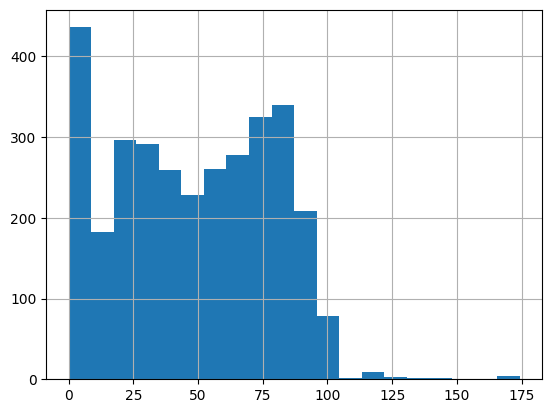

In [69]:
df1['values'].hist(bins=20)

In [70]:
df3 = df1.pivot(columns='year',
                values='values')
df3.describe()

year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,69.000000,72.000000,74.000000,76.000000,75.000000,74.000000,101.000000,144.000000,159.000000,156.000000,...,157.000000,163.000000,162.000000,162.000000,162.000000,162.000000,162.000000,161.000000,156.000000,138.000000
mean,36.101449,38.754167,39.894595,41.318421,45.665333,47.101351,41.354455,36.940972,37.621384,41.259615,...,52.233121,51.336810,51.659259,52.766667,52.891358,54.596296,54.080247,54.286335,53.771154,54.371014
std,27.252682,28.199280,26.249941,26.095556,25.816711,25.245835,29.044891,28.538624,28.305779,29.254613,...,30.178559,29.543914,29.986901,30.070239,30.107190,30.577926,30.934722,30.890394,31.517876,32.444376
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.300000,12.650000,18.525000,21.250000,24.250000,25.300000,17.400000,12.075000,13.250000,16.425000,...,29.500000,29.150000,28.525000,29.650000,28.650000,31.050000,31.075000,29.600000,28.100000,30.475000
50%,33.800000,37.150000,37.550000,37.950000,43.100000,49.650000,38.000000,34.150000,35.000000,38.350000,...,58.000000,54.200000,55.400000,58.200000,60.400000,59.900000,60.250000,60.500000,57.250000,57.550000
75%,61.100000,61.575000,60.275000,61.925000,66.400000,66.575000,62.800000,58.775000,59.750000,64.200000,...,75.500000,76.750000,78.075000,78.575000,77.200000,80.400000,79.475000,80.000000,79.825000,79.925000
max,87.600000,88.200000,87.700000,97.400000,91.100000,92.800000,97.800000,103.600000,99.900000,115.100000,...,136.100000,100.000000,100.000000,131.500000,111.600000,114.600000,119.800000,117.500000,129.300000,172.500000


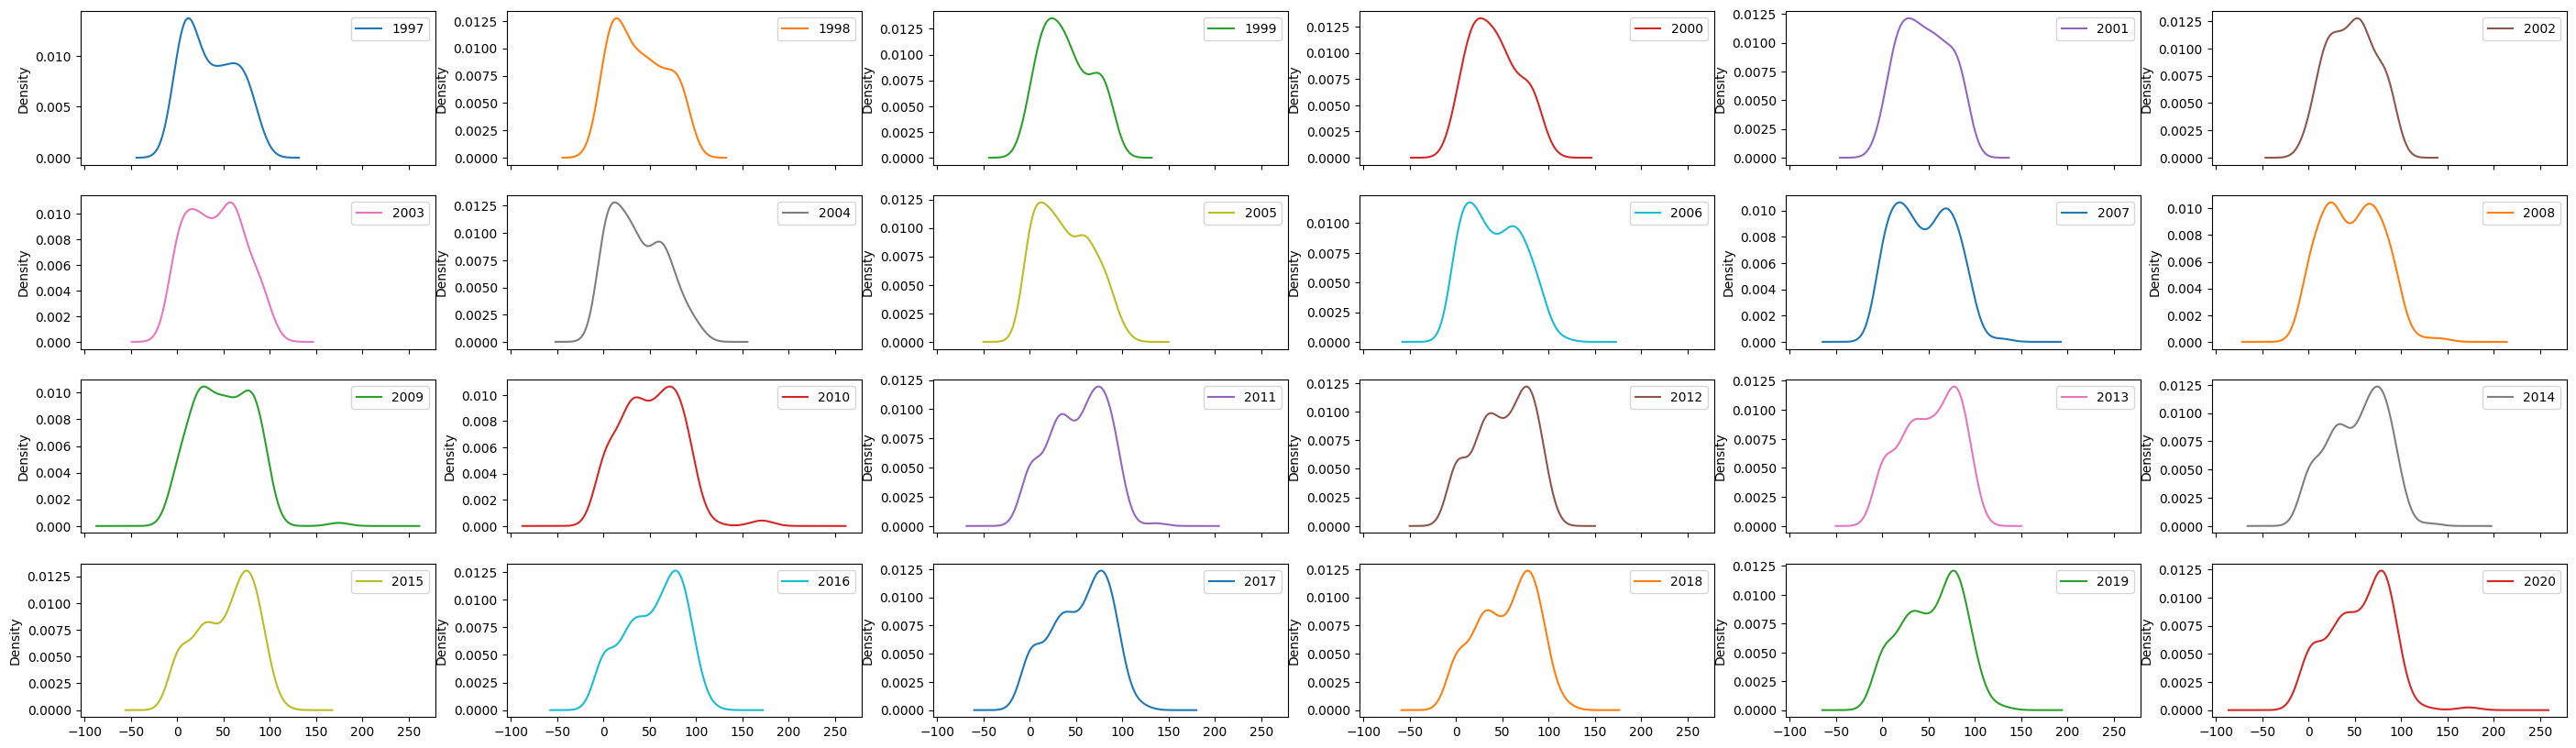

In [71]:
df3.plot(kind='kde',
         legend=True,
         subplots=True,
         layout=(4, 6),
         figsize=(35, 10))
plt.show()

In [72]:
%%html
<iframe src="https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html" width="1000" height="800"></iframe>

## Multivariate Plots

In [73]:
df4 = df1.pivot(index=['year', 'country'], columns=['waste'], values='values')
df4

waste                Glass packaging  Metallic packaging  Other packaging  \
year country                                                                
1997 Austria                    76.5                34.1             53.6   
     Belgium                    70.1                70.3             11.3   
     Bulgaria                    NaN                 NaN              NaN   
     Croatia                     NaN                 NaN              NaN   
     Cyprus                      NaN                 NaN              NaN   
...                              ...                 ...              ...   
2020 Slovakia                   74.4                71.1              2.5   
     Slovenia                   98.4                59.2              8.3   
     Spain                      72.5                83.5              0.0   
     Sweden                     93.5                83.7              0.0   
     United Kingdom              NaN                 NaN              NaN   

waste                Paper and cardboard packaging  Plastic packaging  \
year country                                                            
1997 Austria                                  85.0               20.0   
     Belgium                                  77.5               25.3   
     Bulgaria                                  NaN                NaN   
     Croatia                                   NaN                NaN   
     Cyprus                                    NaN                NaN   
...                                            ...                ...   
2020 Slovakia                                 79.7               56.3   
     Slovenia                                 82.9               44.6   
     Spain                                    71.8               51.4   
     Sweden                                   78.0               33.5   
     United Kingdom                            NaN                NaN   

waste                Wooden packaging  
year country                           
1997 Austria                     14.0  
     Belgium                     52.8  
     Bulgaria                     NaN  
     Croatia                      NaN  
     Cyprus                       NaN  
...                               ...  
2020 Slovakia                    61.4  
     Slovenia                    37.3  
     Spain                       88.0  
     Sweden                      10.8  
     United Kingdom               NaN  

[672 rows x 6 columns]

In [74]:
correlations = df4.corr(method='pearson')
correlations

waste,Glass packaging,Metallic packaging,Other packaging,Paper and cardboard packaging,Plastic packaging,Wooden packaging
waste,,,,,,
Glass packaging,1.000000,0.482180,0.020930,0.435147,0.387818,0.264749
Metallic packaging,0.482180,1.000000,-0.117918,0.595372,0.491707,0.239102
Other packaging,0.020930,-0.117918,1.000000,-0.036841,0.114283,-0.125716
Paper and cardboard packaging,0.435147,0.595372,-0.036841,1.000000,0.539188,0.125427
Plastic packaging,0.387818,0.491707,0.114283,0.539188,1.000000,0.116371
Wooden packaging,0.264749,0.239102,-0.125716,0.125427,0.116371,1.000000


## Matshow

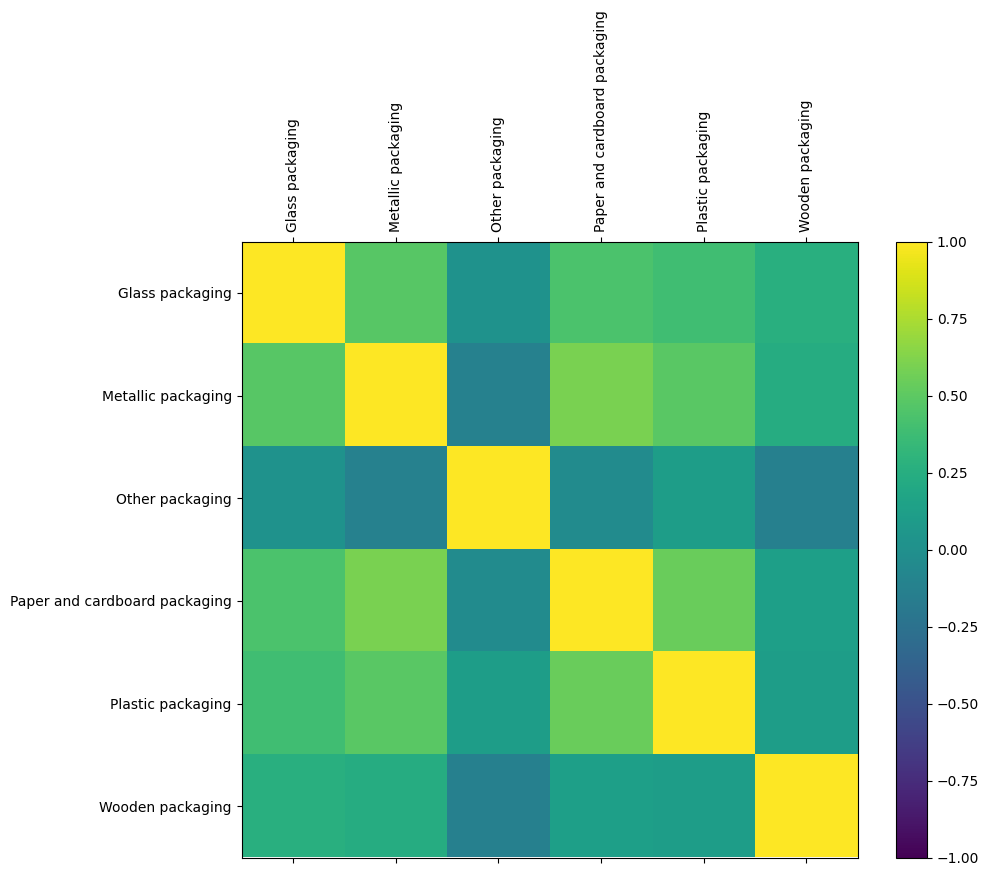

In [75]:
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df4.columns, rotation=90)
ax.set_yticklabels(df4.columns)
plt.show()

## Scatterplot Matrix

In [76]:
from pandas.plotting import scatter_matrix

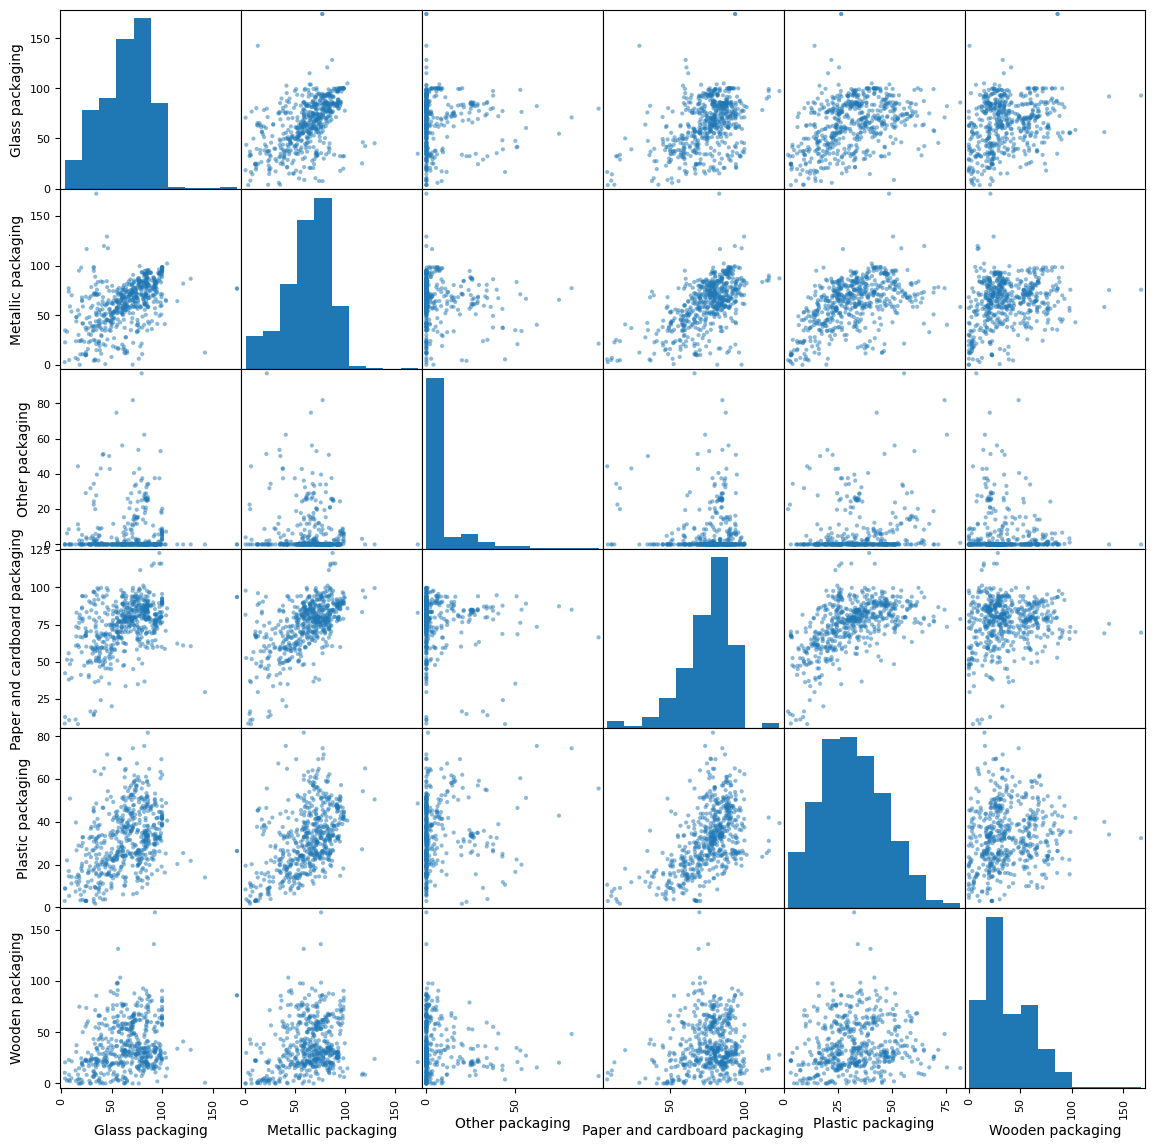

In [77]:
scatter_matrix(df4, figsize=(14, 14))
plt.show()

# UP NEXT
[SQL databases in Python](https://colab.research.google.com/drive/1hhf04dJ6WBSXrre5Es0JZT_1Y0dtl2ji?usp=sharing)